In [ ]:
## This notebook provides code for calculating PhyloFunc distance matrices and visualizing the results.
## Use pip to install PhyloFunc: 
!pip install PhyloFunc 

In [1]:
# Import PhyloFunc package
from PhyloFunc import PhyloFunc_matrix
import pandas as pd

In [17]:
# 1: Calculate PhyloFunc distance matrix using a simulated toy dataset
PhyloFunc_distance_toy=PhyloFunc_matrix(tree_file="tree of toy_dataset.nwk",sample_file="Taxon_Function_toy.csv")
PhyloFunc_distance_toy.to_csv("PhyloFunc_distance_toy.csv",index=True)

All 'MGYG' taxa in the sample data are present as leaf nodes in the tree.
The PhyloFunc distance between "S1" and "S2" is 0.1111111111111111.
The PhyloFunc distance between "S1" and "S3" is 0.31481481481481477.
The PhyloFunc distance between "S2" and "S3" is 0.31481481481481477.
Finish, time consumed: 0.04 seconds


In [5]:
# 2: Calculate PhyloFunc distance matrix using a real dataset from mouse microbiome 
PhyloFunc_distance_mouse=PhyloFunc_matrix(tree_file="16S-rRNA_ML-Tree_Rooted.nwk",sample_file="Taxon_Function_mouse.csv")
PhyloFunc_distance_mouse.to_csv("PhyloFunc_distance_mouse.csv",index=True)

All 'MGYG' taxa in the sample data are present as leaf nodes in the tree.
The PhyloFunc distance between "LFQ intensity HiSF_14spcs_m04_2_147" and "LFQ intensity HiSF_14spcs_m06_2_148" is 0.2009496183918101.
The PhyloFunc distance between "LFQ intensity HiSF_14spcs_m04_2_147" and "LFQ intensity HiSF_14spcs_m07_2_149" is 0.2771705361727095.
The PhyloFunc distance between "LFQ intensity HiSF_14spcs_m04_2_147" and "LFQ intensity HiSF_14spcs_m10_2_150" is 0.22682805122851463.
The PhyloFunc distance between "LFQ intensity HiSF_14spcs_m04_2_147" and "LFQ intensity HiSF_14spcs_m13_2_151" is 0.23493136720339475.
The PhyloFunc distance between "LFQ intensity HiSF_14spcs_m04_2_147" and "LFQ intensity HiSF_15spcs_m03_1_132" is 0.3588121205456635.
The PhyloFunc distance between "LFQ intensity HiSF_14spcs_m04_2_147" and "LFQ intensity HiSF_15spcs_m07_1_133" is 0.35980839375520446.
The PhyloFunc distance between "LFQ intensity HiSF_14spcs_m04_2_147" and "LFQ intensity HiSF_15spcs_m09_1_134" is 0.401

In [7]:
# 3: Calculate PhyloFunc distance matrix using a real dataset from human microbiome 
PhyloFunc_distance_human=PhyloFunc_matrix(tree_file="V49-Midpoint-rooted-Tree.nwk",sample_file="Taxon_Function_human.csv")
PhyloFunc_distance_human.to_csv("PhyloFunc_distance_human.csv",index=True)

All 'MGYG' taxa in the sample data are present as leaf nodes in the tree.
The PhyloFunc distance between "DC.M.48.1" and "DC.H.48.1" is 0.6599978428321918.
The PhyloFunc distance between "DC.M.48.1" and "NZ.H.48.1" is 0.23578663376343237.
The PhyloFunc distance between "DC.M.48.1" and "AZ.M.48.1" is 0.3511741861904077.
The PhyloFunc distance between "DC.M.48.1" and "NZ.M.48.3" is 0.3161655584565242.
The PhyloFunc distance between "DC.M.48.1" and "AZ.L.48.1" is 0.3664293762173849.
The PhyloFunc distance between "DC.M.48.1" and "AZ.M.48.2" is 0.3352323574518779.
The PhyloFunc distance between "DC.M.48.1" and "PR.L.48.1" is 0.29924994042939.
The PhyloFunc distance between "DC.M.48.1" and "NZ.H.48.2" is 0.24492462812067137.
The PhyloFunc distance between "DC.M.48.1" and "CP.L.48.1" is 0.5010274199102484.
The PhyloFunc distance between "DC.M.48.1" and "NZ.L.48.3" is 0.3241141141733359.
The PhyloFunc distance between "DC.M.48.1" and "CP.H.48.3" is 0.7330209551006217.
The PhyloFunc distance b

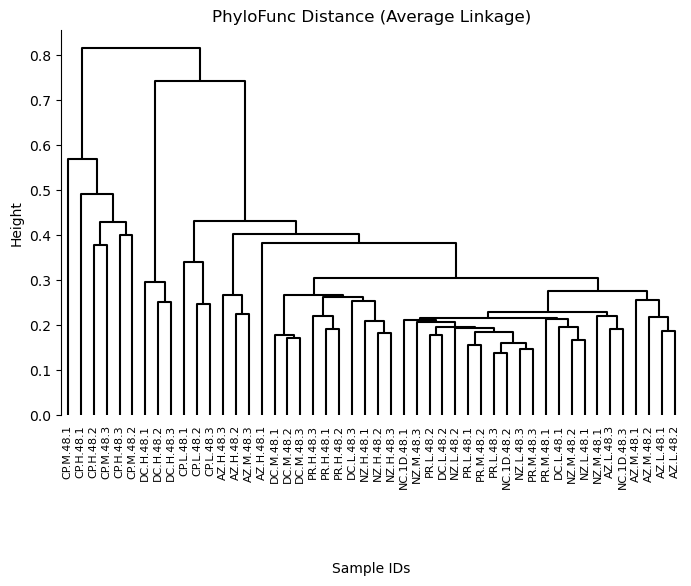

In [9]:
# 4: Draw a hierarchical clustering plot based on the resulting PhyloFunc distance matrix of human gut microbiome 
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import squareform
import pandas as pd

# Generate distance 
data_PhyloFunc = PhyloFunc_distance_human.T
data_PhyloFunc_array = squareform(data_PhyloFunc)
linkage_PhyloFunc = linkage(data_PhyloFunc_array, method='average')

# Create a single subplot
fig, ax = plt.subplots(figsize=(8, 5))

dendrogram_kwargs = dict(leaf_rotation=90, color_threshold=0, above_threshold_color='black')

# Plot bierarchical clustering
dendrogram(linkage_PhyloFunc, ax=ax, labels=data_PhyloFunc.index, **dendrogram_kwargs)
ax.set_title('PhyloFunc Distance (Average Linkage)')
ax.set_ylabel('Height')

# Add annotation text
ax.text(0.5, -0.4, "Sample IDs",
        ha='center', va='center', transform=ax.transAxes, fontsize=10)

# Adjust axis style
def style_axes(ax):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
style_axes(ax)
plt.show()